In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_csv('C:/Users/HM/Desktop/cab pred/taxi_fare/train.csv')


In [7]:
df.head()


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [8]:

df.dropna(inplace=True)
# df.isna().sum()
df.isnull().sum()


trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

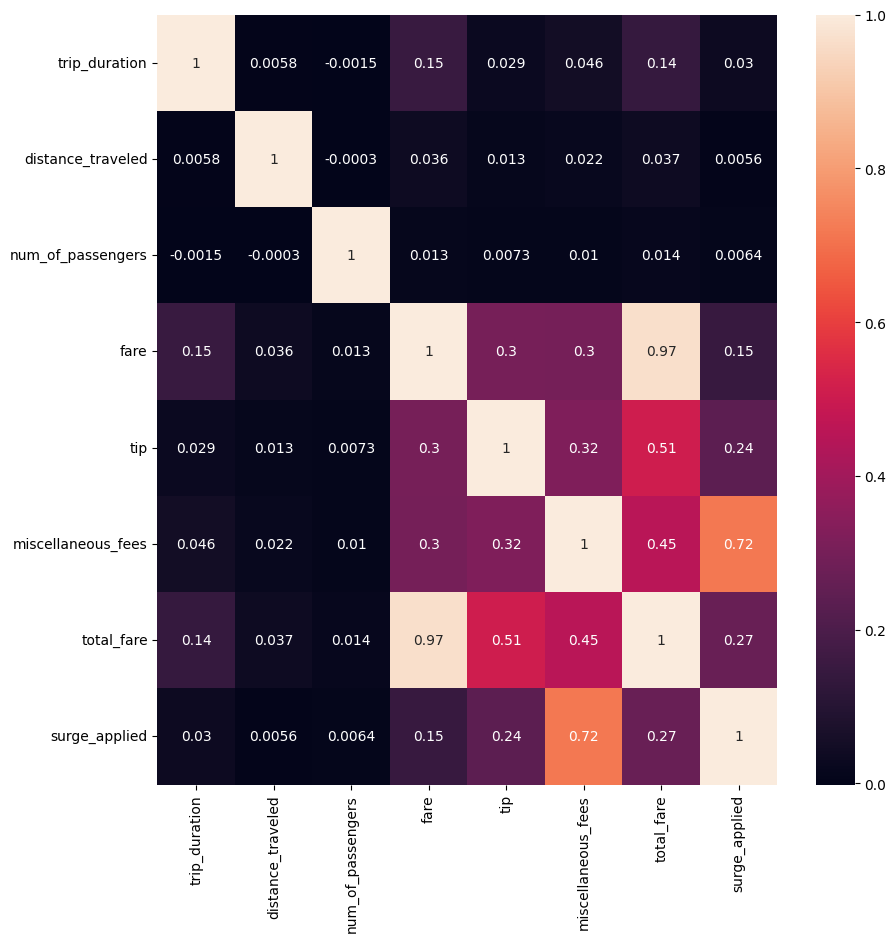

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

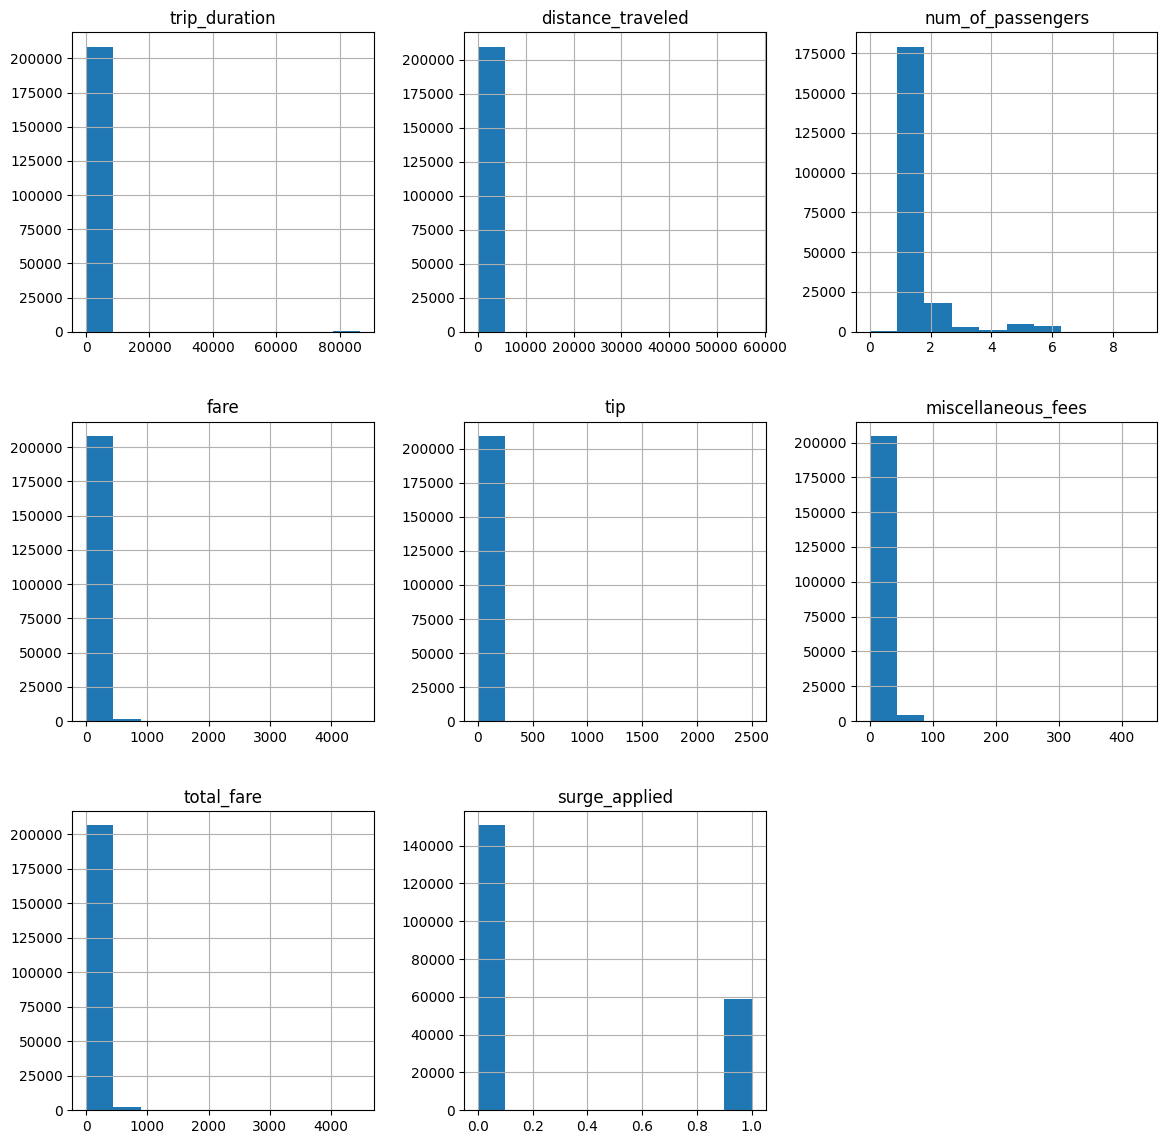

In [10]:
df.hist(figsize=(14,14))
plt.show()

<Figure size 2000x2000 with 0 Axes>

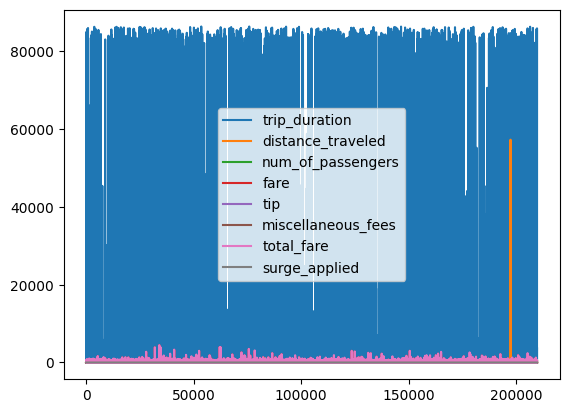

In [11]:
plt.figure(figsize=(20,20))
df.plot()
plt.show()

In [12]:
# Generating the correlation matrix
corr = df.corr()
corr

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


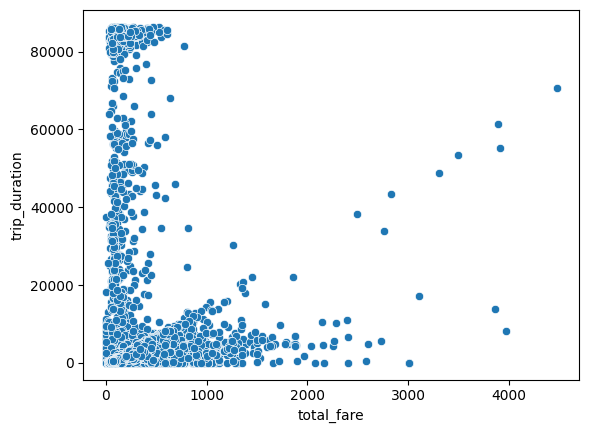

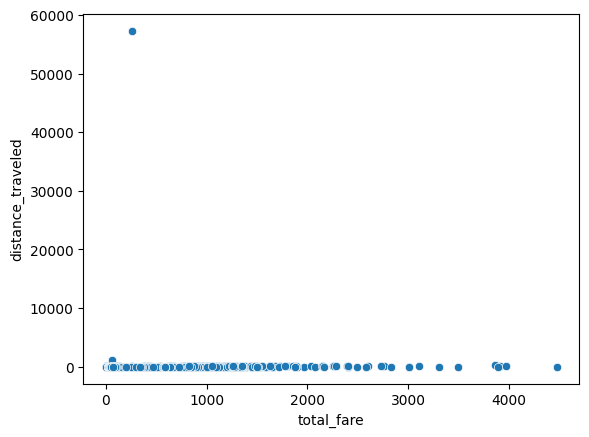

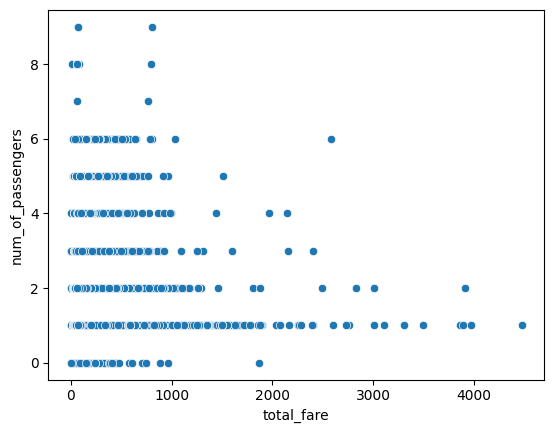

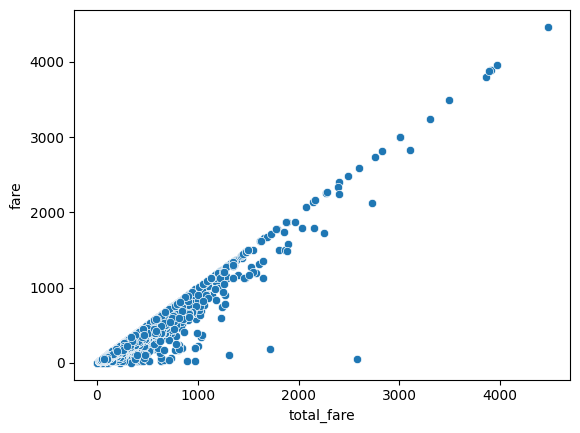

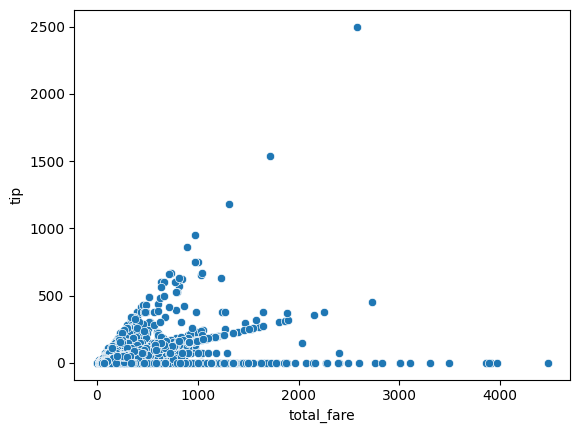

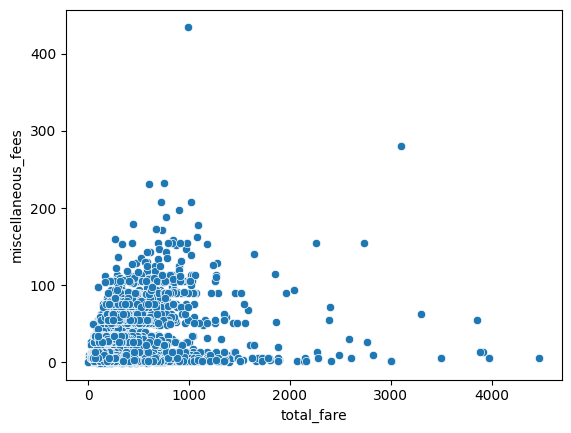

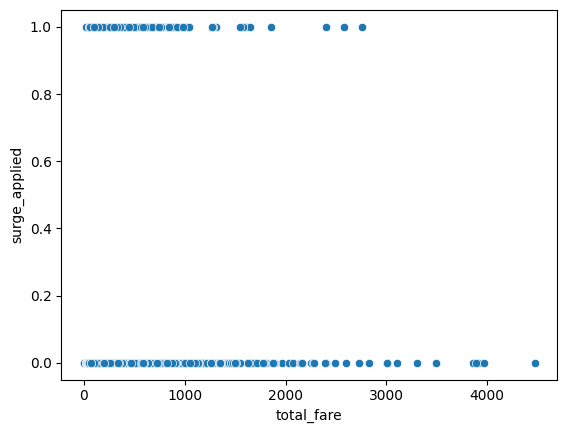

In [13]:
for col in df.columns:
    if col!='total_fare':
        sns.scatterplot(x=df['total_fare'],y=df[col])
        plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='total_fare')
X.shape

(209673, 7)

In [15]:
y = df['total_fare']
y.shape

(209673,)

In [16]:
# Split the dataset into training and testing sets (adjust test_size as needed)
variable= 0.9999124973705899
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable column
mape_valeu=0.2145942263002484

target_range = df['total_fare'].max() - df['total_fare'].min()
print("Range of the target variable:", target_range)


Range of the target variable: 4472.25


In [18]:
#KNN
from sklearn.neighbors import KNeighborsRegressor


In [19]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
# You can set the number of neighbors (k) as per your choice
valeu=0.11315517603626855

# Train the model
knn_regressor.fit(X_train, y_train)




KNeighborsRegressor()

In [20]:
# Make predictions
knn_pred = knn_regressor.predict(X_test)


In [21]:
knn_pred.shape

(41935,)

In [22]:
print("KNN")

mse = mean_squared_error(y_test, knn_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, knn_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_value = mean_absolute_percentage_error(y_test, knn_pred)
print("Mean Absolute Percentage Error (MAPE):", mape_valeu)


# Calculate R-squared (R2) score
r2_score = knn_regressor.score(X_test, y_test)
print("R-squared (R2) score:", r2_score)


KNN
Mean Squared Error: 619.6242423315846
Mean Absolute Error (MAE): 2.5525993799928464
Mean Absolute Percentage Error (MAPE): 0.2145942263002484
R-squared (R2) score: 0.9381842865249932


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [24]:
# Make predictions on the testing set
predictions = decision_tree.predict(X_test)

In [25]:
print("decision tree")
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate R-squared (R2) score
r2_score = decision_tree.score(X_test, y_test)
print("R-squared (R2) score:", r2_score)

decision tree
Mean Squared Error (MSE): 66.38938570108499
Mean Absolute Error (MAE): 0.40331882675576514
Mean Absolute Percentage Error (MAPE): 0.1318611927805887
R-squared (R2) score: 0.9933767806939938


In [26]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


In [27]:

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [28]:
rf_predictions = rf_model.predict(X_test)

In [29]:
print("Random Forest Regression")
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Regression MSE:", rf_mse)

mae = mean_absolute_error(y_test, rf_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, rf_predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate R-squared (R2) score
r2_score = rf_model.score(X_test, y_test)
print("R-squared (R2) score:", r2_score)

Random Forest Regression
Random Forest Regression MSE: 46.09413732115177
Mean Absolute Error (MAE): 0.3298858948372734
Mean Absolute Percentage Error (MAPE): 0.11495178484042679
R-squared (R2) score: 0.9954015001498325


In [30]:
#linear regression
from sklearn.linear_model import LinearRegression


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [41]:

lr_predictions = model.predict(X_test)

# Organize your feature values into a matrix
features = np.array([[60, 20, 2, 40, 2, 3, 2]])

# Use the predict method with the feature matrix
predictionss = model.predict(features)
print(predictionss)


[45.]


C:\Users\HM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:

from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)

mae = mean_absolute_error(y_test, lr_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

value = mean_absolute_percentage_error(y_test, lr_predictions)
print("Mean Absolute Percentage Error (MAPE):", valeu)

# Calculate R-squared (R2) score
vairable = lr_model.score(X_test, y_test)
print("R-squared (R2) score:", variable)

Linear Regression MSE: 6.516826555158467e-26
Mean Absolute Error (MAE): 1.0758318976647062e-13
Mean Absolute Percentage Error (MAPE): 0.11315517603626855
R-squared (R2) score: 0.9999124973705898


In [37]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))